#Os dados consistem em 10.000 observações de espaços tomadas pelo Sloan Digital Sky Survey. Cada observação é descrita por 17 colunas características e 1 coluna de classe que a identifica como sendo uma estrela, galáxia ou quasar

##PASSOS DA CATEGORIZAÇÃO

* INICIALIZAÇÃO

* CARREGAMENTO BASE

* DIVISÃO EM TREINO E TESTE

* TREINAMENTO DA REDE NEURAL

* AVALIAÇÃO DE RESULTADOS




#Início

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls

cars.csv	 concreto.csv  kddCup.txt  vinho.txt
casasBoston.csv  Espaço.csv    Ratos.csv


In [5]:
df1 = pd.read_csv('Espaço.csv', header=0)
df1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR


##Estrutura dos dados

In [6]:
df1.shape

(10000, 18)

In [7]:
df1.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
class         object
dtype: object

18 colunas<br>
1 coluna de categoria de classe de corpo celeste


In [8]:
#df1['Treatment'] = df1['Treatment'].astype('category')
#df1['Treatment'].dtypes

In [9]:
#df1['Behavior'] = df1['Behavior'].astype('category')
#df1['Behavior'].dtypes

In [10]:
#df1['Genotype'] = df1['Genotype'].astype('category')
#df1['Genotype'].dtypes

In [11]:
df1['class'] = df1['class'].astype('category')
df1['class'].dtypes

CategoricalDtype(categories=['GALAXY', 'QSO', 'STAR'], ordered=False)

In [12]:
df1.dtypes

objid         float64
ra            float64
dec           float64
u             float64
g             float64
r             float64
i             float64
z             float64
run             int64
rerun           int64
camcol          int64
field           int64
specobjid     float64
redshift      float64
plate           int64
mjd             int64
fiberid         int64
class        category
dtype: object

#Divisão dos dados

In [13]:
import random
np.random.seed(1) #semente inicial


In [14]:
nlinhas = df1.shape[0]
nlinhas

10000

In [49]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'class'], df1['class'], test_size=0.1)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [50]:
x_train.shape

(9000, 17)

In [51]:
y_train.shape

(9000,)

In [52]:
x_test.shape

(1000, 17)

In [53]:
y_test.shape

(1000,)

In [54]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [55]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [56]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [57]:
X_train_normalized.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,-0.312434,-0.608238,0.620176,0.455516,0.399059,0.429908,0.473021,-0.823890,0.0,-0.984943,-0.013766,0.614515,-0.368614,0.614526,0.838593,-0.186410
1,0.0,-0.023764,2.115105,-0.294065,0.653294,0.979202,1.168094,1.127983,1.349159,0.0,1.411188,0.250445,-0.541232,1.604682,-0.541237,-0.653812,0.046283
2,0.0,0.731153,1.972076,-0.843892,-0.754213,-0.628666,-0.540609,-0.435133,1.349159,0.0,-0.984943,0.852599,1.026011,-0.368975,1.026061,1.312876,-1.563177
3,0.0,0.467693,-0.572586,-0.236460,0.006125,0.091011,0.140174,0.203541,-0.864132,0.0,0.213123,-0.247255,3.352719,-0.369044,3.352684,2.507197,2.009630
4,0.0,-0.508875,-0.572123,-0.101590,-0.168431,-0.125616,-0.033411,0.034320,-0.823890,0.0,0.213123,-0.400866,0.778390,-0.369211,0.778357,1.010819,1.389115


In [58]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,9000.0,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9000.0,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03
mean,0.0,1.802077e-16,3.884547e-17,-8.909170e-16,-8.150764e-16,4.407339e-16,8.547237e-16,3.824102e-18,4.463837e-16,0.0,1.583857e-16,-2.099247e-17,2.405483e-17,-4.195409e-17,-3.107391e-17,-2.266742e-15,-1.345837e-17
std,0.0,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,0.0,-3.500495e+00,-8.010716e-01,-6.745346e+00,-4.811076e+00,-4.111475e+00,-4.041880e+00,-3.987385e+00,-2.462823e+00,0.0,-1.583976e+00,-1.789509e+00,-6.676048e-01,-3.797131e-01,-6.676050e-01,-9.035393e-01,-1.703762e+00
25%,0.0,-3.730221e-01,-6.088955e-01,-5.313915e-01,-5.885927e-01,-6.218363e-01,-6.373288e-01,-6.670729e-01,-8.385235e-01,0.0,-9.849430e-01,-7.265211e-01,-6.480306e-01,-3.688799e-01,-6.480347e-01,-6.902440e-01,-8.069249e-01
50%,0.0,1.007939e-01,-5.714313e-01,2.865725e-01,1.313209e-01,1.340865e-02,-2.735162e-02,-2.868956e-02,-8.238902e-01,0.0,2.131225e-01,-1.991071e-02,-5.697313e-01,-2.596462e-01,-5.697537e-01,-6.259905e-01,-1.673827e-02
75%,0.0,5.439715e-01,8.130073e-01,7.724231e-01,6.828024e-01,6.318186e-01,5.944742e-01,6.011515e-01,1.279651e+00,0.0,8.121553e-01,6.866996e-01,6.145297e-01,-1.305676e-01,6.145261e-01,1.010819e+00,7.601169e-01
max,0.0,1.781383e+00,2.131563e+00,1.180145e+00,2.686591e+00,7.434304e+00,1.012104e+01,5.320112e+00,1.575976e+00,0.0,1.411188e+00,2.861831e+00,3.886046e+00,1.337852e+01,3.886113e+00,3.006652e+00,3.139160e+00


In [59]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# SGD = gradiente descendente estocático

In [60]:
numClasses = len(y_train.values.categories) # sabemos que são 3 categoria
numClasses

3

In [61]:
# Criar encoder para classe: categórico para numérico
# é necessário, não trabalha com categórico letras. Ver RN_Aula01.ipynb, o dado é categórico numérico, não precisou desse tratamento de dados.
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labelencoder_y = labelencoder_y.fit(y_train)

labelencoder_y.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [62]:
#aplicar encoder no treino e no teste
y_train = labelencoder_y.transform(y_train)
y_test  = labelencoder_y.transform(y_test)

In [73]:
RN = Sequential()
RN.add(Dense(9,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
           # 3 é o número de neurônios (entrada + saída / 2 = )
           # input_shape é a tamanho do input, que é 30. Neste formato fica automatizado
RN.add(Dense(numClasses,activation = 'sigmoid'))
           # numClasses = 3. Neste formato fica automatizado
RN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 162       
                                                                 
 dense_7 (Dense)             (None, 3)                 30        
                                                                 
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.utils import to_categorical

In [78]:
# configuração e treinamento da rede neural 

sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 1000, verbose = 1) # configuração e treinamento da rede neural 
          # RN.fit(dados de entrada,dados de saída,loops de treinamento, mostar metrica por loop, ou seja o loss e metrics)    

Epoch 1/1000
282/282 [==============================] - 1s 1ms/step - loss: 0.0532 - accuracy: 0.9056
Epoch 2/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9054
Epoch 3/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9054
Epoch 4/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9054
Epoch 5/1000
282/282 [==============================] - 0s 997us/step - loss: 0.0529 - accuracy: 0.9057
Epoch 6/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9057
Epoch 7/1000
282/282 [==============================] - 0s 995us/step - loss: 0.0528 - accuracy: 0.9058
Epoch 8/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9059
Epoch 9/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9057
Epoch 10/1000
282/282 [==============================] - 0s 1ms/step - loss: 0

In [79]:
# Avaliar base de teste
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03596989065408707
Test accuracy: 0.9430000185966492


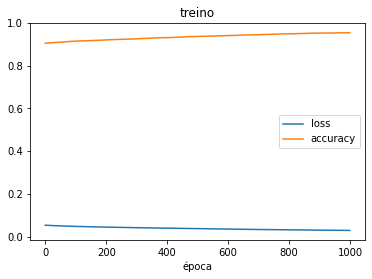

In [80]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['accuracy'], label='accuracy')
plt.title('treino')
plt.xlabel('época')
plt.legend();

#Avaliação de Resultados

In [81]:
# previsões sobre os dados de teste
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test

In [82]:
y_test_predicted

array([[0.97148955, 0.01361284, 0.02293336],
       [0.02583337, 0.00764951, 0.91446376],
       [0.9874861 , 0.0393796 , 0.00498179],
       ...,
       [0.9609633 , 0.00935075, 0.05325547],
       [0.0016568 , 0.03175649, 0.91973364],
       [0.97660047, 0.07955834, 0.00311235]], dtype=float32)

In [83]:
y_test_predicted_indexes

array([0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,

In [84]:
#matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes) 
confMatrix

array([[466,  10,  20],
       [  2,  78,   0],
       [ 25,   0, 399]])

In [85]:
# Matriz de confusão
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1', '2'], columns=['0', '1', '2'],)
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)

Predicted    0   1    2
Actual                 
0          466  10   20
1            2  78    0
2           25   0  399
